In [1]:
import os
os.chdir("C:\\Users\lhuang\PycharmProjects\pyLearng\Python Engineer\Machine learning from scratch")
os.environ["OMP_NUM_THREADS"] = '2'

# K Means

- Unsupervised learning (the data set is unlabeled). 
- Cluster samples into k different group

## Iterative optimization
- Randomly select k cluster center (centroids) <br>
- Assign points to the nearest centroid (clustering)
- Updated the centroids by set them to then mean of each cluster
- Repeat above steps until converged 
    - previous centroids equal to updated centroids, meaning centroids not move anymore) 
    - or reach to maxinum number of iteration 
    
<p align="center">
<img src="images/animated_kmeans.gif" alt="animated_kmeans" style="width:46%; border:0;">
</p>
 
## Euclidean distance
Get the distance between two points:
    -point is a vector and could have more than 2 features
 $$d(p,q)= \sqrt{\sum(p_i-q_i)^2}$$ 

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
import copy
%matplotlib inline

## Section 1: Single iteration example

#### Step2: Get a dataset with 500 obervation and 3 features

In [3]:
X,_=make_blobs(centers=4, n_samples=500, n_features=3, shuffle=True, random_state=42)
print(X.shape)


(500, 3)


#### Step2: Randomly select K centroids

In [43]:
n_samples, n_features=X.shape
K=4
print(f"K:{K}")
random_sample_idxs=np.random.choice(n_samples,K,replace=False)
print(f"random_sample_idxs:{random_sample_idxs}")
centroids=[X[idx] for idx in random_sample_idxs]
centroids

K:4
random_sample_idxs:[398 254 495 102]


[array([  3.46854636, -10.30671738,  10.29312142]),
 array([-0.10022055, -7.22231479, -7.25155046]),
 array([ 5.15349391, -9.76326987,  8.64245188]),
 array([-1.54582149,  9.42706706,  5.461939  ])]

#### Step3: Find the closest centroid for each sample and allocate them into K cluster

In [44]:
# measure the distance 
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [45]:
# An example
x0=X[0]
c0=centroids[0]
d0=euclidean_distance(x0,c0)

c1=centroids[1]
d1=euclidean_distance(x0,c1)

c2=centroids[2]
d2=euclidean_distance(x0,c2)

c3=centroids[3]
d3=euclidean_distance(x0,c3)

print (f"d0:{d0}, d1:{d1},d2:{d2},d3:{d3}" )

d0:1.6653284055079298, d1:16.987900318386632,d2:3.1248206836181605,d3:20.651815662015398


In [46]:
# find closest centroid 
def closest_centroid(sample, centroids):
    distances=[euclidean_distance(sample,point) for point in centroids]
    closest_idx=np.argmin(distances)
    return closest_idx

In [47]:
# an example for X0
closest_c_idx=closest_centroid(x0,centroids)
closest_c_idx

0

In [48]:
# find closest centroid for each sample and allocate them into each cluster
clusters=[[] for _ in range(K)] 
#clusters=[[],[],[],[]]
for idx,sample in enumerate(X):
    centroid_idx=closest_centroid(sample,centroids)
    clusters[centroid_idx].append(idx)

clusters

[[0,
  8,
  19,
  26,
  28,
  33,
  44,
  45,
  52,
  57,
  63,
  71,
  88,
  100,
  113,
  115,
  134,
  136,
  140,
  152,
  163,
  179,
  194,
  200,
  203,
  239,
  248,
  256,
  272,
  291,
  300,
  312,
  314,
  349,
  352,
  364,
  374,
  383,
  385,
  386,
  392,
  398,
  400,
  404,
  419,
  426,
  427,
  429,
  433,
  435,
  448,
  449,
  452,
  467,
  482,
  484],
 [2,
  9,
  14,
  20,
  21,
  25,
  27,
  47,
  49,
  51,
  55,
  56,
  58,
  60,
  61,
  62,
  69,
  74,
  76,
  79,
  87,
  90,
  96,
  97,
  104,
  105,
  106,
  108,
  112,
  118,
  121,
  124,
  125,
  133,
  138,
  146,
  148,
  156,
  157,
  158,
  169,
  170,
  173,
  177,
  178,
  181,
  182,
  185,
  189,
  193,
  196,
  197,
  198,
  201,
  202,
  205,
  206,
  207,
  209,
  211,
  212,
  216,
  217,
  220,
  229,
  231,
  233,
  235,
  237,
  246,
  251,
  254,
  258,
  269,
  271,
  276,
  281,
  287,
  297,
  304,
  306,
  313,
  321,
  323,
  337,
  339,
  356,
  358,
  363,
  365,
  366,
  367,
  36

In [50]:
centroids_old=copy.deepcopy(centroids)

In [51]:
#caculate means for each cluster and update centroids
for cluster_idx, cluster in enumerate(clusters):
    #print(f"idx: {cluster_idx}\ncluster:{cluster}")
    cluster_mean=np.mean(X[cluster],axis=0)
    #print(f"cluster{cluster_idx}:\n{X[cluster]}")
    #print(f"cluster{cluster_idx} mean:{cluster_mean}")
    centroids[cluster_idx]=cluster_mean
 
print(f"centroids_old:{centroids_old} \n updated centroids: {centroids}")

centroids_old:[array([ 3.56168159, -9.56623187,  9.98233095]), array([ 1.9249936 , -6.86055031, -7.00488888]), array([ 4.68158865, -9.16424593,  8.85078903]), array([-5.54471204,  8.25803225,  3.35729512])] 
 updated centroids: [array([ 3.56168159, -9.56623187,  9.98233095]), array([ 1.9249936 , -6.86055031, -7.00488888]), array([ 4.68158865, -9.16424593,  8.85078903]), array([-5.54471204,  8.25803225,  3.35729512])]


In [52]:
#Put above step into a fuction for updating centroid during iteration

def get_centroids(clusters):
    centroids=np.zeros((K, n_features))
    for cluster_idx, cluster in enumerate(clusters):
        #print(f"idx: {cluster_idx}\ncluster:{cluster}")
        cluster_mean=np.mean(X[cluster],axis=0)
        centroids[cluster_idx]=cluster_mean
    return centroids

In [53]:
centroids=get_centroids(clusters)
centroids

array([[ 3.56168159, -9.56623187,  9.98233095],
       [ 1.9249936 , -6.86055031, -7.00488888],
       [ 4.68158865, -9.16424593,  8.85078903],
       [-5.54471204,  8.25803225,  3.35729512]])

## Section2: Iteration Optimization

### Step1: Get optimized centroids and clusters through iterations

In [16]:
from sklearn.preprocessing import StandardScaler
X,_=make_blobs(centers=4, n_samples=500, n_features=3, shuffle=True, random_state=42)
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

K=4
random_sample_idxs=np.random.choice(n_samples,K,replace=False)
centroids=[X[idx] for idx in random_sample_idxs]

for _ in range(300):
    #update clusters
    clusters=[[] for _ in range(K)] 
    for idx,sample in enumerate(X):
        centroid_idx=closest_centroid(sample,centroids)
        clusters[centroid_idx].append(idx)

    #update centroids
    centroids_old=copy.deepcopy(centroids)
    centroids=get_centroids(clusters)

    #check if converged
    distances=[euclidean_distance(centroids_old[i],centroids[i]) for i in range(K)]
    if round(sum(distances),1)==0:
        break
centroids

array([[ 1.08258724, -1.13513086,  1.17788353],
       [-1.48586001,  0.88526754, -0.00261707],
       [-0.22942578,  1.08576022,  0.36488915],
       [ 0.63269854, -0.8358969 , -1.54015561]])

### Step2: Get labels (cluster index) for each sample

In [17]:
labels=np.empty(n_samples, dtype='int')
for cluster_idx, cluster in enumerate(clusters):
    #print(f"cluster idx:{cluster_idx}")
    for sample_idx in cluster:
        #print(f"sample_idx:{sample_idx}")
        labels[sample_idx]=cluster_idx
        
labels.shape

(500,)

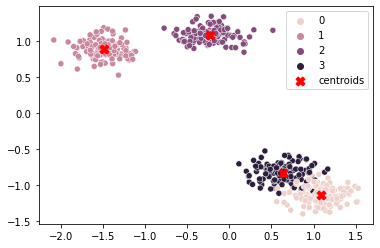

In [18]:
#2D plot

sns.scatterplot(data=X, x=X[:,0], y=X[:,1], hue=labels)
plt.scatter(centroids[:,0], centroids[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

##  Section3: Elbow method to select optimal K
#### Distortion
- Elbow compare Distortion value for each K selected
- Distortion is calculated as the average of the squared distances from centroid of the respective clusters to each data point. Typically, the Euclidean distance metric is used.

$$ Distortion=\dfrac{1}{n}*\sum(distance(point_c,centroid_c)^2)$$

$$ Inertia=\sum(distance(point_c,centroid_c)^2)$$

In [32]:
# calulate distortion for K from 1 to 10

X,_=make_blobs(centers=4, n_samples=500, n_features=3, shuffle=True, random_state=42)
n_samples, n_features=X.shape
distortions=[]
Klist = range(1, 10)
for K in range(1,10):
    np.random.seed(0)
    random_sample_idxs=np.random.choice(n_samples,K,replace=False)
    centroids=[X[idx] for idx in random_sample_idxs]


    for _ in range(300):
        #update clusters
        clusters=[[] for _ in range(K)] 
        for idx,sample in enumerate(X):
            centroid_idx=closest_centroid(sample,centroids)
            clusters[centroid_idx].append(idx)
        # print("clusters")
        #update centroids
        centroids_old=centroids
        centroids=get_centroids(clusters)
        # print("new centroids")
        # print(centroids)


        #check if converged
        distances=[euclidean_distance(centroids_old[i],centroids[i]) for i in range(K)]
        if round(sum(distances),2)==0:
            break

    dis=[(euclidean_distance(X[clusters[i]],centroids[i]))**2 for i in range(K)]

    distortions.append(sum(dis)/X.shape[0])

In [33]:
distortions

[130.25932835146008,
 82.20534194713692,
 8.802683089173629,
 2.887591812097177,
 2.6991633136177193,
 2.5312403335229297,
 2.4062473922542154,
 2.234553225506337,
 2.124513657646762]

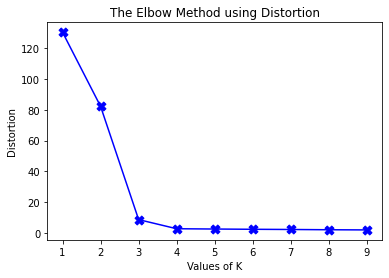

In [21]:
plt.plot(Klist, distortions, 'bx-')
plt.scatter(Klist, distortions, marker="X", c="b", s=80)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

## Section4: Create a class/package

In [22]:

def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class CKMeans:
    
    def __init__(self, K=5, max_iters=100,plot_steps=False):
        self.K=K
        self.max_iters=max_iters
        self.plot_steps=plot_steps
        
        # list of sample indices for each cluster
        self.clusters=[[] for _ in range(self.K)]
        
        #mean feature vestor for each cluster
        self.centroids=[]
    
    def predict(self, X):
        self.X=X
        self.n_samples, self.n_features=X.shape
        
        #initialize centroids
        random_sample_idxs=np.random.choice(self.n_samples,self.K,replace=False)
        self.centroids=[self.X[idx] for idx in random_sample_idxs]
        # print("centroids")
        # print(self.centroids)
        #opzimation
        for _ in range(self.max_iters):
            #update clusters
            self.clusters=self._create_clusters(self.centroids)

            #update centroids
            centroids_old=self.centroids
            self.centroids=self._get_centroids(self.clusters)
  
            
            #check if converged
            if self._is_converged(centroids_old, self.centroids):
                break
        #retrun cluster labels
        lx=self._get_cluster_labels(self.clusters)
        #print(f"label:{lx}")
        return self._get_cluster_labels(self.clusters)
            
            
    def _get_cluster_labels(self, clusters):
        labels=np.empty(self.n_samples, dtype='int')
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx]=cluster_idx
        return labels

        
                
    def _create_clusters(self,centroids):
        clusters=[[] for _ in range(self.K)]
        for idx,sample in enumerate(self.X):
            centroid_idx=self._closest_centroid(sample,centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        distances=[euclidean_distance(sample,point) for point in centroids]
        closest_idx=np.argmin(distances)
        return closest_idx
    
    def _get_centroids(self, clusters):
        centroids=np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            #print(f"idx: {cluster_idx}\ncluster:{cluster}")
            cluster_mean=np.mean(self.X[cluster],axis=0)
            centroids[cluster_idx]=cluster_mean
        return centroids
            
    def _is_converged(self, centroids_old, centroids):
        distances=[euclidean_distance(centroids_old[i],centroids[i]) for i in range(self.K)]
        return round(sum(distances),1)==0
    
    

    

In [23]:

X,_=make_blobs(centers=4, n_samples=500, n_features=3, shuffle=True, random_state=42)
print(X.shape)

(500, 3)


centroid:[[ 1.08258724 -1.13513086  1.17788353]
 [-0.22942578  1.08576022  0.36488915]
 [-1.48586001  0.88526754 -0.00261707]
 [ 0.63269854 -0.8358969  -1.54015561]]


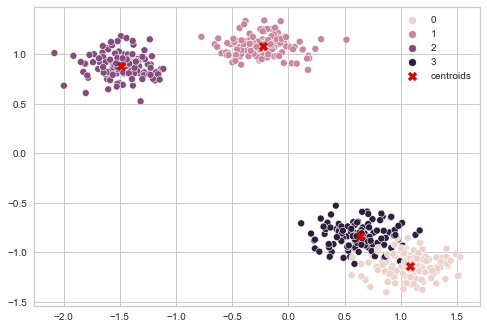

In [30]:
# clusters=len(np.unique(y))
# print(clusters)

k=CKMeans(K=4, max_iters=300, plot_steps=False)
y_pred=k.predict(X)
print(f"centroid:{k.centroids}")
sns.scatterplot(data=X, x=X[:,0], y=X[:,1], hue=y_pred)
plt.scatter(k.centroids[:,0], k.centroids[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()


## Section 5: Use python package Sklearn for modeling

In [34]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from sklearn.preprocessing import StandardScaler
X,y=make_blobs(centers=4, n_samples=500, n_features=3, shuffle=True, random_state=42)
#Suggest to normalize X to dealt with varying size and density
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

centroid:[[-8.69338443  7.4259396   2.2511005 ]
 [ 4.17987029 -9.34433563  9.35771981]
 [ 1.9249936  -6.86055031 -7.00488888]
 [-2.39603965  9.09012491  4.46348974]]
inertia:1443.7959060485882


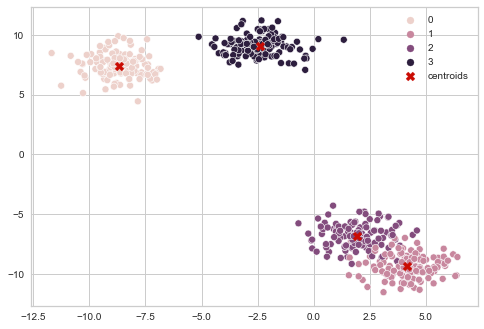

In [35]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=1).fit(X)

print(f"centroid:{kmeans.cluster_centers_}")

print(f"inertia:{kmeans.inertia_}")

sns.scatterplot(data=X, x=X[:,0], y=X[:,1], hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

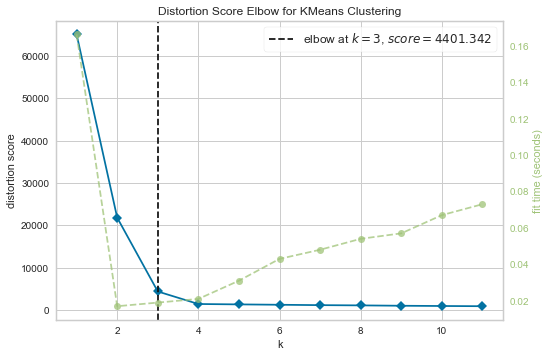

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(X)
visualizer.show()

## Section 6:  Advantages and Disadvantages

### Advantages:
    - Simple to implement
    - Guarantees convergence
    - Can be applied to large scale data
    - No training data needed
### Disadvantages
    - Sensitive to outliers
    - Not applicable to categorical data
        -K-mode for categorical dataset
        -k-Prototypes for mixture of numerical and categorical data
    - Curse of dimensionality:As number of features increases, the distance beween points decrease, so the k-means become less effective to distinguish points
    - To solver the problem above, adding a pre-clustering step, such as PCA or spectral clustering